In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d HimanshuPoddar/zomato-bangalore-restaurants

zomato-bangalore-restaurants.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/zomato-bangalore-restaurants.zip

Archive:  /content/zomato-bangalore-restaurants.zip
replace zomato.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: zomato.csv              y



# **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/zomato.csv')

In [ ]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

# **Data Cleaning**

In [ ]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

* rate---------------7775
* phone--------------1208
* location-----------21
* rest_type----------227
* dish_liked---------28078
* cuisines-----------45
* approx_cost(for two people)---346

**Cuisines**

In [ ]:
data['cuisines'].isnull().sum()

45

In [ ]:
data.dropna(subset='cuisines',inplace=True)

In [ ]:
data['cuisines'].isnull().sum()

0

**Rate** **Column**

In [ ]:
data["rate"].isnull().sum()

7741

In [ ]:
data["Rating"]=data["rate"].str.split("/").str[0]


In [ ]:
data["Rating"].isnull().sum()

7741

In [ ]:
data["Rating"]=pd.to_numeric(data["Rating"],errors='coerce')

In [ ]:
data.Rating.isnull().sum()

10018

In [ ]:
data["Rating"].fillna(data.Rating.mean().round(1),inplace = True)

In [ ]:
data['Rating']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: Rating, Length: 51672, dtype: float64

In [ ]:
data.Rating.isnull().sum()

0

In [ ]:
data.drop('rate',axis=1,inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51672 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51672 non-null  object 
 1   address                      51672 non-null  object 
 2   name                         51672 non-null  object 
 3   online_order                 51672 non-null  object 
 4   book_table                   51672 non-null  object 
 5   votes                        51672 non-null  int64  
 6   phone                        50493 non-null  object 
 7   location                     51672 non-null  object 
 8   rest_type                    51466 non-null  object 
 9   dish_liked                   23639 non-null  object 
 10  cuisines                     51672 non-null  object 
 11  approx_cost(for two people)  51352 non-null  object 
 12  reviews_list                 51672 non-null  object 
 13  menu_item       

**Phone Column**

In [ ]:
data.phone.isnull().sum()

1179

In [ ]:
data.phone.fillna("XXXXXXXXXX",inplace=True)

In [ ]:
data.phone.isnull().sum()

0

Drop null values in Location

In [ ]:
data.location.isnull().sum()

**rest_type----------227**

In [ ]:
data.rest_type.isnull().sum()

In [ ]:
data.dropna(subset=["rest_type"],inplace=True)

approx_cost(for two people)---346

Cost

In [ ]:
data.rename(columns={"approx_cost(for two people)": "Cost"}, inplace=True)

In [ ]:
data.Cost.isnull().sum()

In [ ]:
data['Cost'] = pd.to_numeric(data['Cost'].str.replace(',', ''), errors='coerce').fillna(data['Cost'].mode().iloc[0])

In [ ]:
data.Cost=data.Cost.astype(int)

In [ ]:
data.Cost.head(1)

In [ ]:
data.drop('dish_liked',axis=1,inplace=True)

In [ ]:
data.drop('menu_item',axis=1,inplace=True)

In [ ]:
data.isnull().sum()

In [ ]:
data.info()

**Duplicates Checking**

In [ ]:
data.duplicated().sum()

Important columns:


1.   rest_type
2.   Cuisines
3.   reviews_list



# Preprocessing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data['Mean Rating'] = data.groupby('name')['Rating'].transform('mean').round(2)
scaler = MinMaxScaler(feature_range=(1, 5))
data['Mean Rating'] = scaler.fit_transform(data[['Mean Rating']]).round(2)

In [ ]:
data.head()

In [ ]:
data_unique = data.drop_duplicates(subset=['name', 'location'], keep='first')

In [ ]:
data_unique.shape

In [ ]:
data_unique.reviews_list=data_unique.reviews_list.str.lower()

In [ ]:
#Remove puntuations
import string
punc_to_remove=string.punctuation
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', punc_to_remove))
data_unique["reviews_list"] = data_unique["reviews_list"].apply(lambda text: remove_punctuation(text))

In [ ]:
# import pandas as pd

# # Assuming data_unique is your DataFrame
# # Replace 'rest_type' with the actual column name in your DataFrame
# t = data_unique['rest_type'].str.split(',').explode().unique().tolist()


In [ ]:
data_unique.reviews_list[0]

In [ ]:
df=data_unique[data_unique['votes']>50]

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

# **Data Visualization**

In [ ]:
labels = ["Banashankari", "Bannerghatta Road", "Basavanagudi", "Bellandur", "Brigade Road", "Brookefield", "BTM",
          "Church Street", "Electronic City", "Frazer Town", "HSR", "Indiranagar", "Jayanagar", "JP Nagar",
          "Kalyan Nagar", "Kammanahalli", "Koramangala 4th Block", "Koramangala 5th Block", "Koramangala 6th Block",
          "Koramangala 7th Block", "Lavelle Road", "Malleshwaram", "Marathahalli", "MG Road", "New BEL Road",
          "Old Airport Road", "Rajajinagar", "Residency Road", "Sarjapur Road", "Whitefield"]

y = [900, 1630, 685, 1290, 1220, 660, 580, 1260, 730, 2530, 2100, 1930, 2240, 850, 650, 1020, 2500, 1150, 1180, 620,
     840, 2045, 935, 690, 445, 600, 680, 1070, 2400, 2100]

fig, axes1 = plt.subplots(figsize=(10, 10))
colors = plt.cm.tab20c.colors

axes1.pie(y, labels=labels, autopct="%0.2f%%", colors=colors, shadow=True, startangle=90)

axes1.axis("equal")
axes1.set_title('Distribution of Restaurants in Different Locations')

plt.show()


In [ ]:
 x = np.array(["Banashankari","Bannerghatta Road","Basavanagudi","'Bellandur","Brigade Road", "Brookefield", "BTM", "Church Street",
              "Electronic City", "Frazer Town", "HSR", "Indiranagar", "Jayanagar","JP Nagar", "Kalyan Nagar", "Kammanahalli",
              "Koramangala 4th Block", "Koramangala 5th Block","Koramangala 6th Block","Koramangala 7th Block","Lavelle Road","Malleshwaram",
              "Marathahalli", "MG Road", "New BEL Road", "Old Airport Road", "Rajajinagar", "Residency Road", "Sarjapur Road","Whitefield"])
y = np.array([900, 1630, 685, 1290, 1220, 660, 580, 1260, 730, 2530, 2100, 1930, 2240, 850, 650, 1020, 2500, 1150, 1180, 620, 840, 2045, 935, 690, 445, 600, 680, 1070, 2400, 2100])
plt.barh(x,y)

In [ ]:
# Histogram for Cleaned Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Cleaned Ratings')
plt.xlabel('Cleaned Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Count plot for Restaurant Types
plt.figure(figsize=(12, 6))
sns.countplot(x='rest_type', data=df, order=df['rest_type'].value_counts().index)
plt.title('Count of Restaurants by Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=90, ha='right')
plt.show()


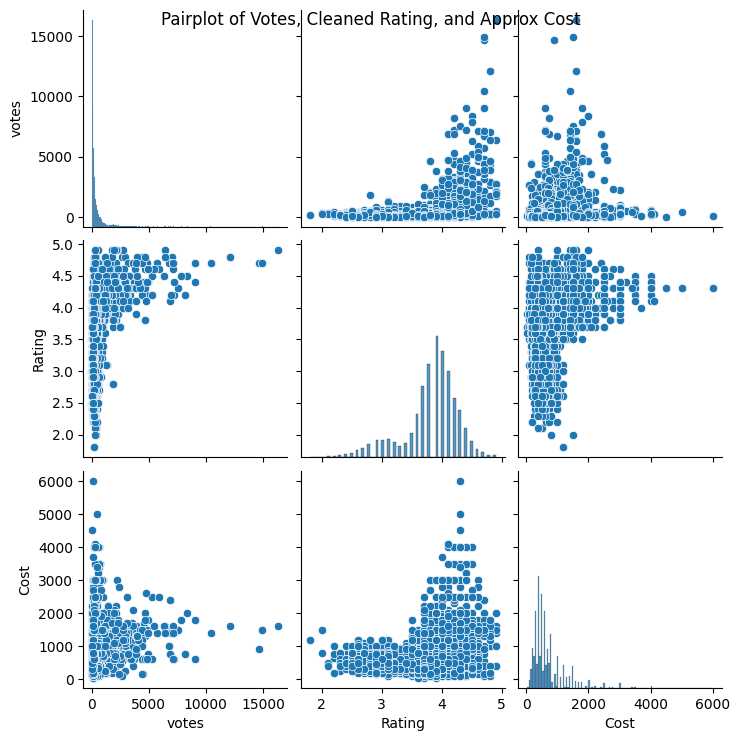

In [ ]:
# Pairplot
sns.pairplot(df[['votes', 'Rating', 'Cost']])
plt.suptitle('Pairplot of Votes, Cleaned Rating, and Approx Cost')
plt.show()

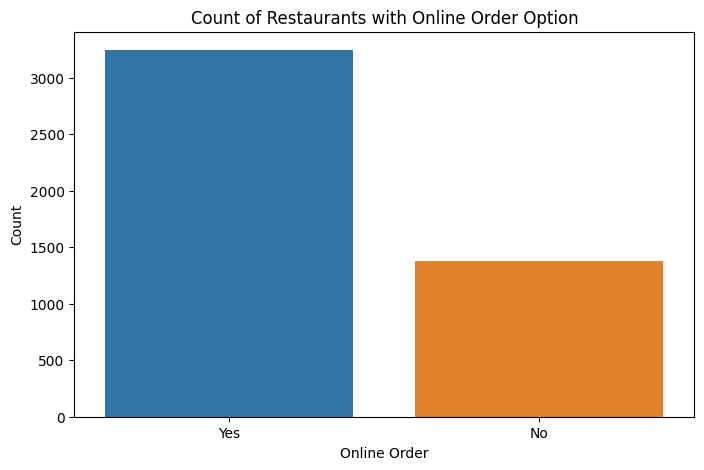

In [ ]:
# Bar plot for Online Order
plt.figure(figsize=(8, 5))
sns.countplot(x='online_order', data=df)
plt.title('Count of Restaurants with Online Order Option')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Cleaned Rating')

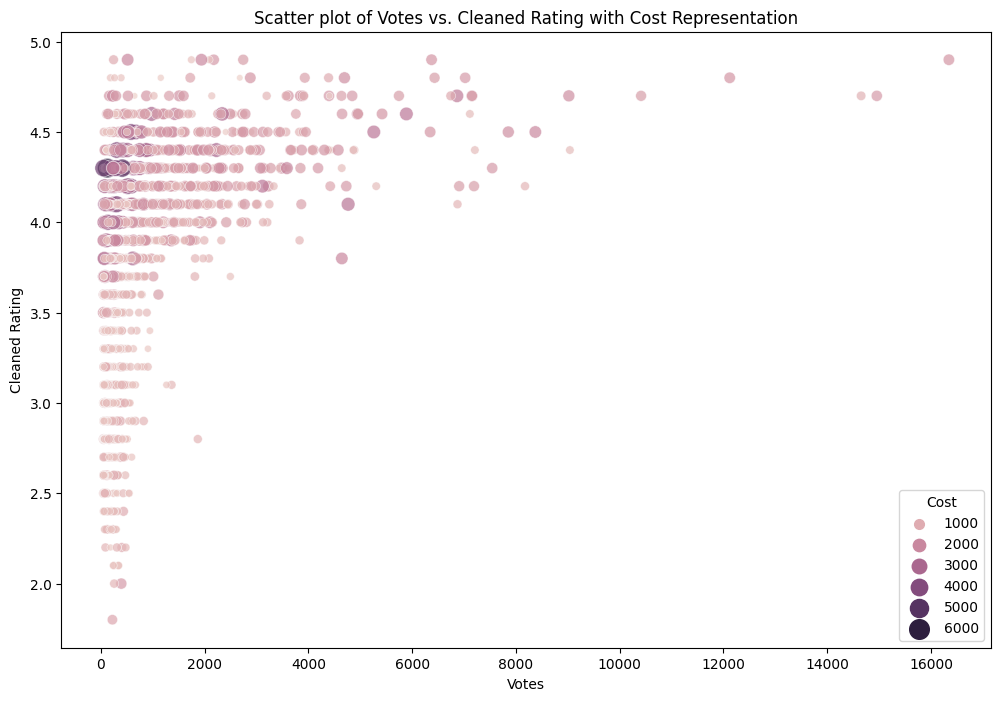

In [ ]:
# Scatter plot with color representation of 'approx_cost(for two people)'
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x='votes', y='Rating', hue='Cost', size='Cost', sizes=(20, 200), data=df, alpha=0.7)
plt.title('Scatter plot of Votes vs. Cleaned Rating with Cost Representation')
plt.xlabel('Votes')
plt.ylabel('Cleaned Rating')

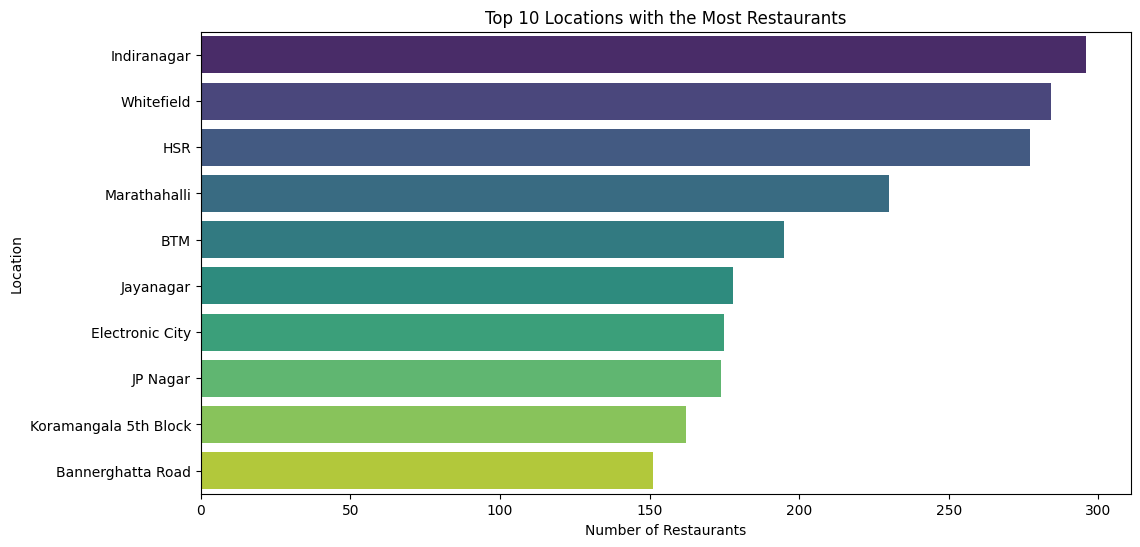

In [ ]:
# Bar graph for Top 10 Locations
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts().nlargest(10)
sns.barplot(x=top_locations, y=top_locations.index, palette='viridis')
plt.title('Top 10 Locations with the Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

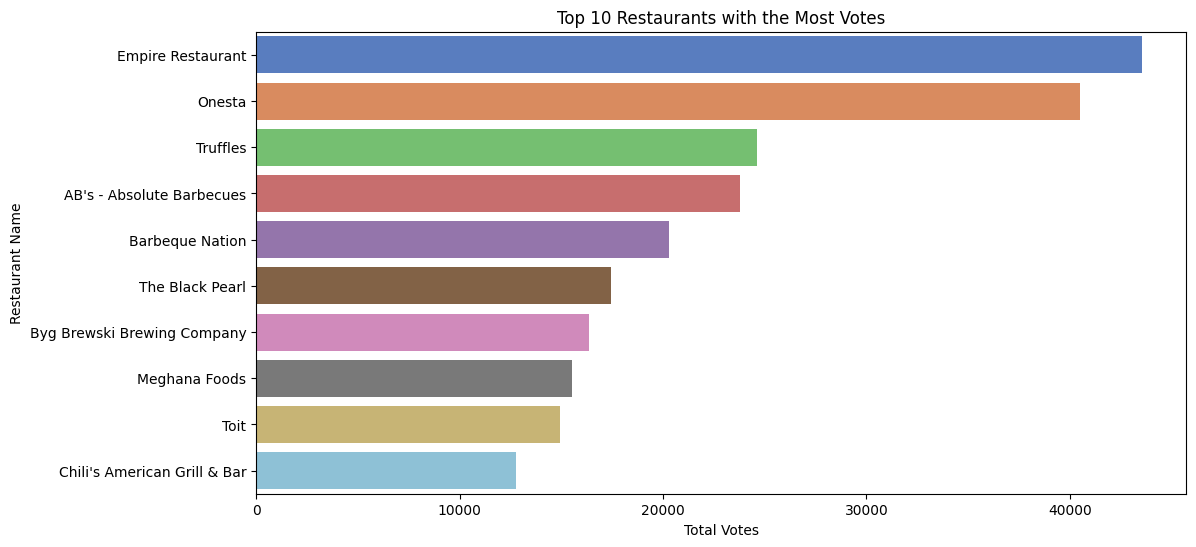

In [ ]:
# Bar graph for Top 10 Restaurants based on Votes
plt.figure(figsize=(12, 6))
top_restaurants = df.groupby('name')['votes'].sum().nlargest(10)
sns.barplot(x=top_restaurants.values, y=top_restaurants.index, palette='muted')
plt.title('Top 10 Restaurants with the Most Votes')
plt.xlabel('Total Votes')
plt.ylabel('Restaurant Name')
plt.show()


# **Model** **Building**

In [ ]:
df['tags'] = df['rest_type']+df['cuisines']+df['reviews_list']

<ipython-input-67-e9ca9d35c4f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tags'] = df['rest_type']+df['cuisines']+df['reviews_list']


In [ ]:
filtered_res=df[['name','location','address','online_order','book_table','phone','rest_type','Cost','Rating','Mean Rating','tags']].reset_index(drop=True)

In [ ]:
filtered_res.rest_type

0             Casual Dining
1             Casual Dining
2       Cafe, Casual Dining
3               Quick Bites
4             Casual Dining
               ...         
4620          Casual Dining
4621                    Bar
4622          Casual Dining
4623             Food Court
4624     Casual Dining, Bar
Name: rest_type, Length: 4625, dtype: object

In [ ]:
filtered_res.shape

(4625, 11)

In [ ]:
filtered_res['name']=filtered_res['name'].str.lower()

In [ ]:
filtered_res

,name,location,address,online_order,book_table,phone,rest_type,Cost,Rating,Mean Rating,tags
0,jalsa,Banashankari,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Yes,Yes,080 42297555\r\n+91 9743772233,Casual Dining,800,4.1,3.99,"Casual DiningNorth Indian, Mughlai, Chineserat..."
1,spice elephant,Banashankari,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Yes,No,080 41714161,Casual Dining,800,4.1,3.97,"Casual DiningChinese, North Indian, Thairated ..."
2,san churro cafe,Banashankari,"1112, Next to KIMS Medical College, 17th Cross...",Yes,No,+91 9663487993,"Cafe, Casual Dining",800,3.8,3.58,"Cafe, Casual DiningCafe, Mexican, Italianrated..."
3,addhuri udupi bhojana,Banashankari,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",No,No,+91 9620009302,Quick Bites,300,3.7,3.45,"Quick BitesSouth Indian, North Indianrated 40 ..."
4,grand village,Basavanagudi,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",No,No,+91 8026612447\r\n+91 9901210005,Casual Dining,600,3.8,3.58,"Casual DiningNorth Indian, Rajasthanirated 40 ..."
...,...,...,...,...,...,...,...,...,...,...,...
4620,chianti,"ITPL Main Road, Whitefield","1, Ground Floor, Ascendas Park Square Mall, Wh...",No,Yes,+91 8061224716\n+91 8061224717,Casual Dining,1500,4.6,4.59,Casual DiningItalianrated 40 ratedn had visit...
4621,chime - sheraton grand bengaluru whitefield ho...,"ITPL Main Road, Whitefield",Sheraton Grand Bengaluru Whitefield Hotel & Co...,No,Yes,080 49652769,Bar,2500,4.3,4.23,BarFinger Foodrated 40 ratedn nice and friend...
4622,chung wah,"ITPL Main Road, Whitefield","Unit 04-01, 4th floor, Ascendas Park Square Ma...",No,No,+91 9535948061,Casual Dining,800,2.5,3.52,"Casual DiningChinese, Momosrated 10 ratedn fo..."
4623,fujian express,"ITPL Main Road, Whitefield","Food Court, Ascendas Park Square Mall, Whitefi...",Yes,No,+91 7760075458\n+91 9591852291,Food Court,600,3.8,3.14,"Food CourtThai, Chinese, Momosrated 40 ratedn ..."


In [ ]:
filtered_res.duplicated().sum()

0

In [ ]:
filtered_res['tags'][0]

'Casual DiningNorth Indian, Mughlai, Chineserated 40 ratedn  a beautiful place to dine inthe interiors take you back to the mughal era the lightings are just perfectwe went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at allthe only complaint is that the breads could have been betterwould surely like to come here again rated 40 ratedn  i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangoutncheers rated 20 ratedn  its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by

In [ ]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
filtered_res['tags']=filtered_res['tags'].apply(stem)

In [ ]:
filtered_res['tags'][0]

In [ ]:
cv=CountVectorizer(max_features=10000,stop_words='english')

In [ ]:
vector = cv.fit_transform(filtered_res['tags']).toarray()

In [ ]:
cv.get_feature_names_out()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
similarity

In [ ]:
similarity.shape

In [ ]:
filtered_res_out=filtered_res[['name','location','address','online_order','book_table','phone','rest_type','Cost','Rating','Mean Rating']].reset_index(drop=True)

In [ ]:
filtered_res_out["name"]=filtered_res_out["name"].apply(lambda text: remove_punctuation(text))
filtered_res_out["name"]=filtered_res_out["name"].str.replace(' ', '')

In [ ]:
filtered_res_out

In [ ]:
filtered_res_out.rest_type = filtered_res_out.rest_type.apply(lambda text: remove_punctuation(text))

In [ ]:
filtered_res_out.rest_type

In [ ]:
output=filtered_res[['name','location','Rating','Cost','rest_type','book_table','online_order','phone','address']]

In [ ]:
output

In [ ]:
popularity_output=filtered_res[['name','location','Rating','Mean Rating','Cost','rest_type','book_table','online_order','phone','address']]

In [ ]:
#location
popularity = popularity_output[popularity_output['Rating'] > 4].sort_values(by='Mean Rating', ascending=False).reset_index(drop=True)
# popularity.drop('Mean ',axis=1,inplace=True)

In [ ]:
def recommend_main(res,loc,res_type):
  punc_to_remove = string.punctuation
  res = res.translate(str.maketrans('', '', punc_to_remove))
  res = res.replace(' ', '')
  res=res.lower()
  if res!='all' and res not in filtered_res_out['name'].unique():
    res_output = pd.DataFrame()
    return res_output #print("Data Not Available")
  elif(loc=='all' and res_type=='all'):
    res_output = pd.DataFrame()
    matching_res=filtered_res_out[filtered_res_out['name']==res]
    if not matching_res.empty:
      index = matching_res.index[0:]
      if len(index)>1:
        print(f"{len(index)} {res} restaurants is available in different location")
        for i in range(len(index)):
          location=filtered_res['location'][index[i]]
          print(f"{res} at {location}")
          distance=sorted(list(enumerate(similarity[index[i]])),reverse=True,key=lambda x:x[1])
          print()
          for i in distance[0:6]:
            temp_df = output.iloc[i[0]]
            temp_res = pd.DataFrame({
                'name': [temp_df['name']],
                'location': [location],
                'rating': [temp_df['Rating']],
                'cost': [temp_df['Cost']],
                'rest_type': [temp_df['rest_type']],
                'book_table': [temp_df['book_table']],
                'online_order': [temp_df['online_order']],
                'phone': [temp_df['phone']],
                'address': [temp_df['address']]
                })
            res_output = pd.concat([res_output, temp_res], ignore_index=True)
        return res_output
      else:
        distance=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])
        for i in distance[0:6]:
          temp_df = output.iloc[i[0]]
          temp_res = pd.DataFrame({
              'name': [temp_df['name']],
              'location': [location],
              'rating': [temp_df['Rating']],
              'cost': [temp_df['Cost']],
              'rest_type': [temp_df['rest_type']],
              'book_table': [temp_df['book_table']],
              'online_order': [temp_df['online_order']],
              'phone': [temp_df['phone']],
              'address': [temp_df['address']]
              })
          res_output = pd.concat([res_output, temp_res], ignore_index=True)
        return res_output
  elif(res=='all' and res_type=='all'):
    res_output = pd.DataFrame()
    top5=popularity[popularity['location']==loc][:6]
    # for i in range(len(top5)):
    #   print(top5.iloc[i])
    #   print()
    for i in range(len(top5)):
      temp_df = top5.iloc[i]
      temp_res = pd.DataFrame({
          'name': [temp_df['name']],
          'location': [temp_df['location']],
          'rating': [temp_df['Rating']],
          'cost': [temp_df['Cost']],
          'rest_type': [temp_df['rest_type']],
          'book_table': [temp_df['book_table']],
          'online_order': [temp_df['online_order']],
          'phone': [temp_df['phone']],
          'address': [temp_df['address']]
          })
      res_output = pd.concat([res_output, temp_res], ignore_index=True)
    return res_output
  elif(res !='all' and res_type == 'all'):
    res_output = pd.DataFrame()
    detail=popularity[(popularity['location'] == loc) & (popularity['name'] == res)]
    # print(detail.iloc[0, 0:])
    # print()
    # print("Related_restaurants")
    # print()
    # # res_output=detail
    temp=detail.iloc[0, 0:]
    det_tem=pd.DataFrame({
              'name': [temp['name']],
              'location': [temp['location']],
              'rating': [temp['Rating']],
              'cost': [temp['Cost']],
              'rest_type': [temp['rest_type']],
              'book_table': [temp['book_table']],
              'online_order': [temp['online_order']],
              'phone': [temp['phone']],
              'address': [temp['address']]
              })
    res_output = pd.concat([res_output, det_tem], ignore_index=True)
    matching_res=filtered_res_out[(filtered_res_out['location'] == loc) & (filtered_res_out['name'] == res)]
    if not matching_res.empty:
      index = matching_res.index[0]
      distance=sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])
      # for i in distance[1:6]:
      #   print()
      #   print(output.iloc[i[0]])
      for i in distance[1:6]:
        temp_df = output.iloc[i[0]]
        temp_res = pd.DataFrame({
            'name': [temp_df['name']],
            'location': [temp_df['location']],
            'rating': [temp_df['Rating']],
            'cost': [temp_df['Cost']],
            'rest_type': [temp_df['rest_type']],
            'book_table': [temp_df['book_table']],
            'online_order': [temp_df['online_order']],
            'phone': [temp_df['phone']],
            'address': [temp_df['address']]
            })
        res_output = pd.concat([res_output, temp_res], ignore_index=True)
      return res_output
    else:
      return 0                                                     # 1 means return nothing there no res in the location
  elif(res == 'all' and loc != 'all' and res_type!='all'):
    res_output = pd.DataFrame()
    res_loc_det=popularity[(popularity['location'] == loc) & (popularity['rest_type'].isin([res_type]))]
    if not res_loc_det.empty:
        for i in range(0,len(res_loc_det)):
            temp_df = res_loc_det.iloc[i]
            temp_res = pd.DataFrame({
                'name': [temp_df['name']],
                'location': [temp_df['location']],
                'rating': [temp_df['Rating']],
                'cost': [temp_df['Cost']],
                'rest_type': [temp_df['rest_type']],
                'book_table': [temp_df['book_table']],
                'online_order': [temp_df['online_order']],
                'phone': [temp_df['phone']],
                'address': [temp_df['address']]
                })
            res_output = pd.concat([res_output, temp_res], ignore_index=True)
        return res_output
    else:
        top5=popularity[popularity['location']==loc][:10]
        for i in range(len(top5)):
            temp_df = top5.iloc[i]
            temp_res = pd.DataFrame({
                'name': [temp_df['name']],
                'location': [temp_df['location']],
                'rating': [temp_df['Rating']],
                'cost': [temp_df['Cost']],
                'rest_type': [temp_df['rest_type']],
                'book_table': [temp_df['book_table']],
                'online_order': [temp_df['online_order']],
                'phone': [temp_df['phone']],
                'address': [temp_df['address']]
                })
            res_output = pd.concat([res_output, temp_res], ignore_index=True)
        return res_output
  else:
    print("invalid Input")

In [ ]:
recommend_main('the hidden home', 'all', 'all')

In [ ]:
recommend_main('Jalsa', 'all', 'all')

In [ ]:
recommend_main('jalsa', 'Marathahalli', 'all')

In [ ]:
res=recommend_main('all','Marathahalli','Casual Dining')

In [ ]:
recommend_main('all', 'Marathahalli', 'all')

In [ ]:
recommend_main('jalsa','all','all')

In [ ]:
recommend_main('all','HSR','Bar')

In [ ]:
import pickle

In [ ]:
pickle.dump(filtered_res,open('filtered_res.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(popularity,open('popularity.pkl','wb'))
pickle.dump(output,open('output.pkl','wb'))

In [ ]:
pickle.dump(recommend_main,open('recommend_main.pkl','wb'))

In [ ]:
pickle.dump(filtered_res_out,open('filtered_res_out.pkl','wb'))